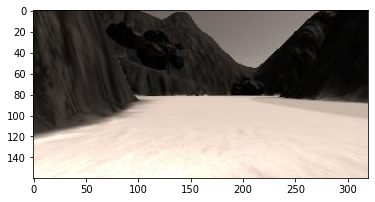

In [11]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
%matplotlib inline
# Define the filename, read and plot the image
filename = 'sample.jpg'

image = mpimg.imread(filename)

plt.imshow(image)
plt.show()


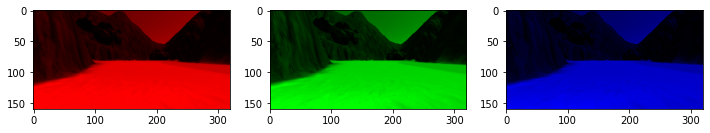

In [3]:
import numpy as np 

redChannel = np.copy(image)
redChannel[:, :, [1, 2]] = 0
greenChannel = np.copy(image)
greenChannel[:, :, [0, 2]] = 0
blueChannel = np.copy(image)
blueChannel[:, :, [0, 1]] = 0

fig = plt.figure(figsize=(12,3)) # Create a figure for plotting
plt.subplot(131)
plt.imshow(redChannel)
plt.subplot(132)
plt.imshow(greenChannel)
plt.subplot(133)
plt.imshow(blueChannel)


In [8]:
def colorThreshold(img, red_th, gre_th, blu_th):
    
    red = img[:,:,[0]]
    gre = img[:,:,[1]]
    blu = img[:,:,[2]]
    
    red_low_values_flags = red < red_th
    red_high_values_flags = red >= red_th

    gre_low_values_flags = gre < gre_th
    gre_high_values_flags = gre >= gre_th

    blu_low_values_flags = blu < blu_th
    blu_high_values_flags = blu >= blu_th


    red[red_low_values_flags] = 0
    red[red_high_values_flags] = 255

    gre[gre_low_values_flags] = 0
    gre[gre_high_values_flags] = 255

    blu[blu_low_values_flags] = 0
    blu[blu_high_values_flags] = 255
    

    image_th = np.concatenate((red, gre, blu), axis = 2)

    plt.imshow(image_th)
    plt.show()
    
    return image_th
    
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select


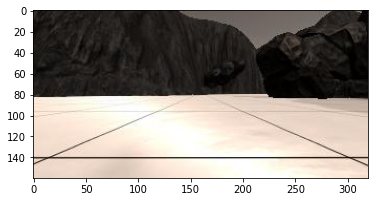

In [9]:
 
imageGrid = mpimg.imread('example_grid.jpg')
plt.imshow(imageGrid)
plt.show() 


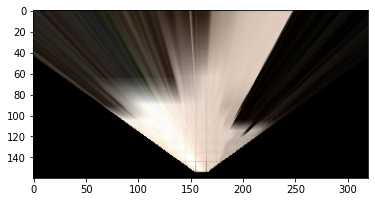

In [13]:
import numpy as np
import cv2


def transformImage(img, src, dst):
    transMatrix = cv2.getPerspectiveTransform(src, dst); '''Perspective Transformation Matrix'''
    warpedImage = cv2.warpPerspective( img, transMatrix, (img.shape[1], img.shape[0]) )
    return warpedImage

dst_size = 5
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6

sourcePoints = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
#destinationPoints = np.float32([[13.4819, 140.431], [13, 95], [300, 95.9153], [302.514, 141.077]])

destinationPoints = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])

warpedImage = transformImage(imageGrid, sourcePoints, destinationPoints)
plt.imshow(warpedImage)
plt.show()



In [41]:
def color_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all thre threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

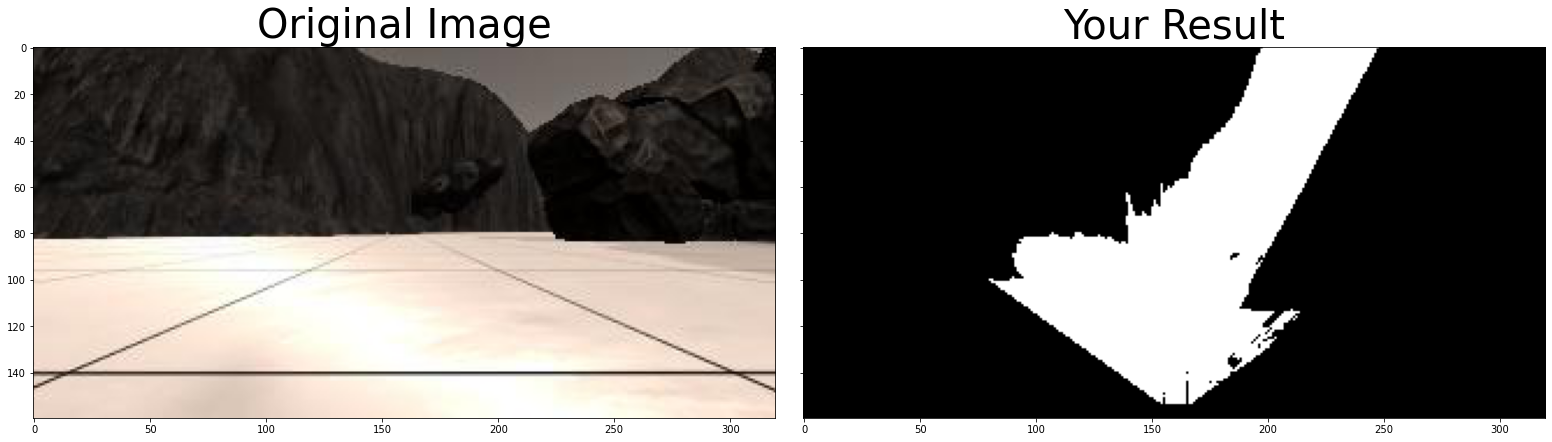

In [15]:
colorsel = color_thresh(warpedImage, rgb_thresh=(160, 160, 160))  

# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(imageGrid)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Thresholded and Warped Image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show() 



In [ ]:
#Mapping to ROver Coordinates

In [44]:
def roverView(image):
    ypos, xpos = image.nonzero()
    x_pixel = xpos - image.shape[1]/2
    y_pixel = image.shape[0] - ypos    
    
    return x_pixel, y_pixel

''' print(xpos, ypos)
    plt.plot(xpos-160, 160-ypos, '+')
    plt.xlim(-160, 160)
    plt.ylim(0, 160)
    plt.show()''' 


" print(xpos, ypos)\n    plt.plot(xpos-160, 160-ypos, '+')\n    plt.xlim(-160, 160)\n    plt.ylim(0, 160)\n    plt.show()"

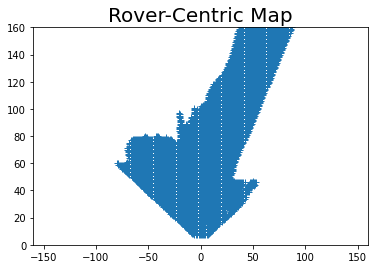

In [47]:
xpix, ypix = roverView(colorsel)

plt.plot(xpix, ypix, '+')
plt.xlim(-160, 160)
plt.ylim(0, 160)
plt.title('Rover-Centric Map', fontsize=20)
plt.show()